In [59]:
# Import relevant libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check if the paths are valid
tot_int = r"C:/Users/franc/Capstone/Code/tot_int.xlsx"
quant_int = r"C:/Users/franc/Capstone/Code/quant_int.xlsx"
avg_int = r"C:/Users/franc/Capstone/Code/avg_int.xlsx"

path = [tot_int, quant_int, avg_int]

# Assertion for loop    
for p in path:
    assert os.path.isfile(p)
    with open(p, "r") as f:
        pass

In [20]:
# Average cost (BRL) of hospitalization (per ICU type) in terms of daily utilization(2019-2021) | Source SIH-SUS
df_1= pd.read_excel(avg_int)
# Drop child ICU care
df_1= df_1.drop(columns=['UTI Infantil I', 'UTI Infantil II', 'UTI Infantil III', 'UTI Neonatal I', 'UTI Neonatal II', 'UTI Neonatal III', 'UTI II PEDIATRICO-SINDROME RESP. AGUDA GRAVE (SRAG)-COVID-19'])
# Translation PT-BR -> EN-US
df_1.rename(columns={'Diárias de UTI': 'ICU days', 'Cirúrgico': 'Surgical', 'Mais de um tipo de UTI/UCI utilizado': 'More than one ICU type utilized', 'UTI Adulto II': 'Adult ICU II', 'UTI Adulto III': 'Adult ICU III', 'UTI I': 'ICU I',
 'UTI II ADULTO-SINDROME RESP. AGUDA GRAVE (SRAG)-COVID-19': 'COVID 19 Adult ICU II', 'UTI Coronariana-UCO tipo II' : 'Coronary ICU Type II', 'UTI Queimados':'Burned ICU', 'UTI Coronariana-UCO tipo III' : 'Coronary ICU Type III'}, inplace = True)
# See df
df_1


,ICU days,Surgical,More than one ICU type utilized,Adult ICU II,Adult ICU III,Coronary ICU Type II,Coronary ICU Type III,ICU I,COVID 19 Adult ICU II,Burned ICU
0,1,0.000000,3441.591814,3854.482734,5376.412449,7211.069646,7355.641497,2152.112857,3272.255896,2573.773930
1,2,5443.287962,0.000000,4259.191792,6157.676881,8450.939600,7565.794776,2466.357498,4951.079616,3185.175833
2,3,7124.668476,0.000000,4621.715679,6816.730155,9291.437719,8039.807887,2575.626727,6606.211101,3491.285605
3,4,7805.196077,0.000000,4966.150694,7177.331359,9844.122224,8967.518568,2933.863118,8257.677820,4392.495947
4,5,8522.901736,0.000000,5338.166677,7735.600903,10847.917202,9908.161094,3094.803170,9925.802229,4801.915601
5,6,9430.479796,0.000000,5726.083003,8158.969782,11605.209849,10981.846111,3430.507789,11598.046486,5240.633400
6,7,10283.386288,0.000000,6182.744614,8639.860986,11974.669029,11376.218202,3212.628506,13255.133139,5288.569567
7,8 ≤ 14,13677.749330,0.000000,8011.470458,10625.999120,14416.404328,14682.089401,3947.045060,19202.712466,7696.962753
8,15 ≤ 21,21070.697040,0.000000,12131.984120,15262.176979,20590.098359,21854.807848,5333.818148,31066.307645,11644.748132
9,22 ≤ 28,28054.157997,0.000000,16357.064036,20168.588472,28245.015367,28629.793584,6702.848425,43118.467099,14564.295976


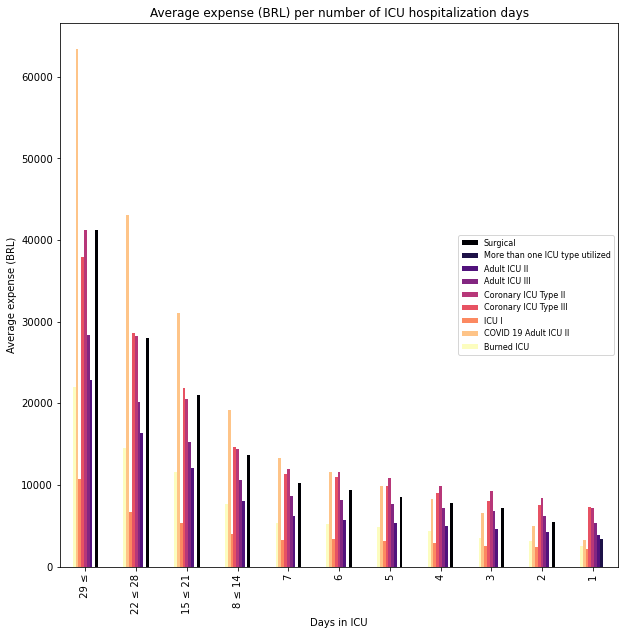

In [11]:
y_vals= []
for name in df_1.columns:
    y_vals.append(name)
y_vals.remove('ICU days')

color_map =  plt.cm.get_cmap('magma')

df_1.plot(x='ICU days', y= y_vals, kind = 'bar', figsize= (10,10), cmap= color_map)
plt.xlabel('Days in ICU')
plt.ylabel('Average expense (BRL)')
plt.legend(loc=7, prop={'size': 8})
plt.title('Average expense (BRL) per number of ICU hospitalization days')
plt.gca().invert_xaxis()



# Regression

### Considerations
<p> As a linear regression expects numerial inputs for both axis, the number of days in the ICU to be considered will be the mean of both numbers when dealing with an interval and 29 for the extreme point. The error will be further analyzed to see if the results are acceptable and that assumption can be made.

Summary of ICU days and ICU days 
 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.941e+31
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          8.15e-138
Time:                        13:26:30   Log-Likelihood:                 344.13
No. Observations:                  11   AIC:                            -684.3
Df Residuals:                       9   BIC:                            -683.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.4

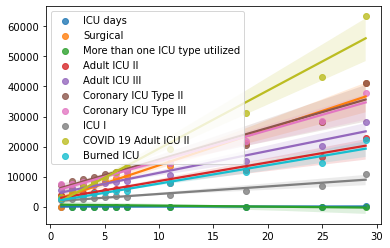

In [77]:
# Regression for all
df_2=df_1.copy()
df_2['ICU days'] = df_2['ICU days'].replace(['8 ≤ 14','15 ≤ 21','22 ≤ 28', ' 29 ≤'],[int(11), int(18), int(25), int(29)])
X = np.array(df_2['ICU days'])
X2 = sm.add_constant(X)

for cov in df_2.columns:
    y = np.array(df_2[f'{cov}'])
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(f'Summary of {cov} and ICU days \n \n {est2.summary()}')
    sns.regplot(x=X, y=y, data=df_2, label= cov)

plt.legend()
    
   

